# Determine Fly Head Orientation


This notebook has been used in the initial analysis and testing of method used in flyflip, as such there is no guarentee that it is up to date with the rest of the library.



In [ ]:
# Import Libraries
import sys
import os
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cv2
import copy
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
# plot_dir = os.path.join(current_dir,'plotting')
sys.path.append(current_dir)
# print(sys.path)
from flyplot.plotting import polarplot as polarplt# polar plotting module
from flyplot.parsing import basic_sections as bsc_sec # basic data parsing methods
from flyplot.parsing.data_range import find_startdata, find_enddata # setting start and end of analysis region 
from flyplot.parsing.exact_exp_groups import sub_exp_group  # more dataparsing methods
from flyplot.led_convert import get_LED_angle_in_rad
from flyplot.plotting.flyviz import single_image_save,two_image_save_Otsu, two_image_save, get_contour_centroid, get_objectmask, get_fill_flymask,contour_rot_matrix,contour_hrz_matrix
from flyplot.data.data_loader import data_loader
from find_fly_angle.find_fly_anglev2 import *


In [26]:
# Load in Example Data:
sample_figs = data_loader()['figs']
sample_imgs = data_loader()['imgs']
sample_raw_dat =data_loader()['raw_data']
# Example Image:
file = '20240502125110_7355' # 5244
file_name = None
for img in sample_imgs:
    if os.path.basename(img).strip('.png')== file:
        file_name = img
# file ="20240415120905_0121" 
# file_name = "imgs/" + file +".png"
fly_mask_orig, fly_mask_hrz,max_contour_hrz,centroid_hrz, body_axis_pt_0_hrz,body_axis_pt_1_hrz, angle_og, angle_rot = contour_hrz_matrix(file_name)


Angle: 71.60198091314216 71.60198091314216
Est Rotated Angle: -108.39801908685786 -1.8919023357053266
Angle: 90.0536226428922 90.05362264289221
Est Rotated Angle: -89.94637735710779 -1.5698604351228065


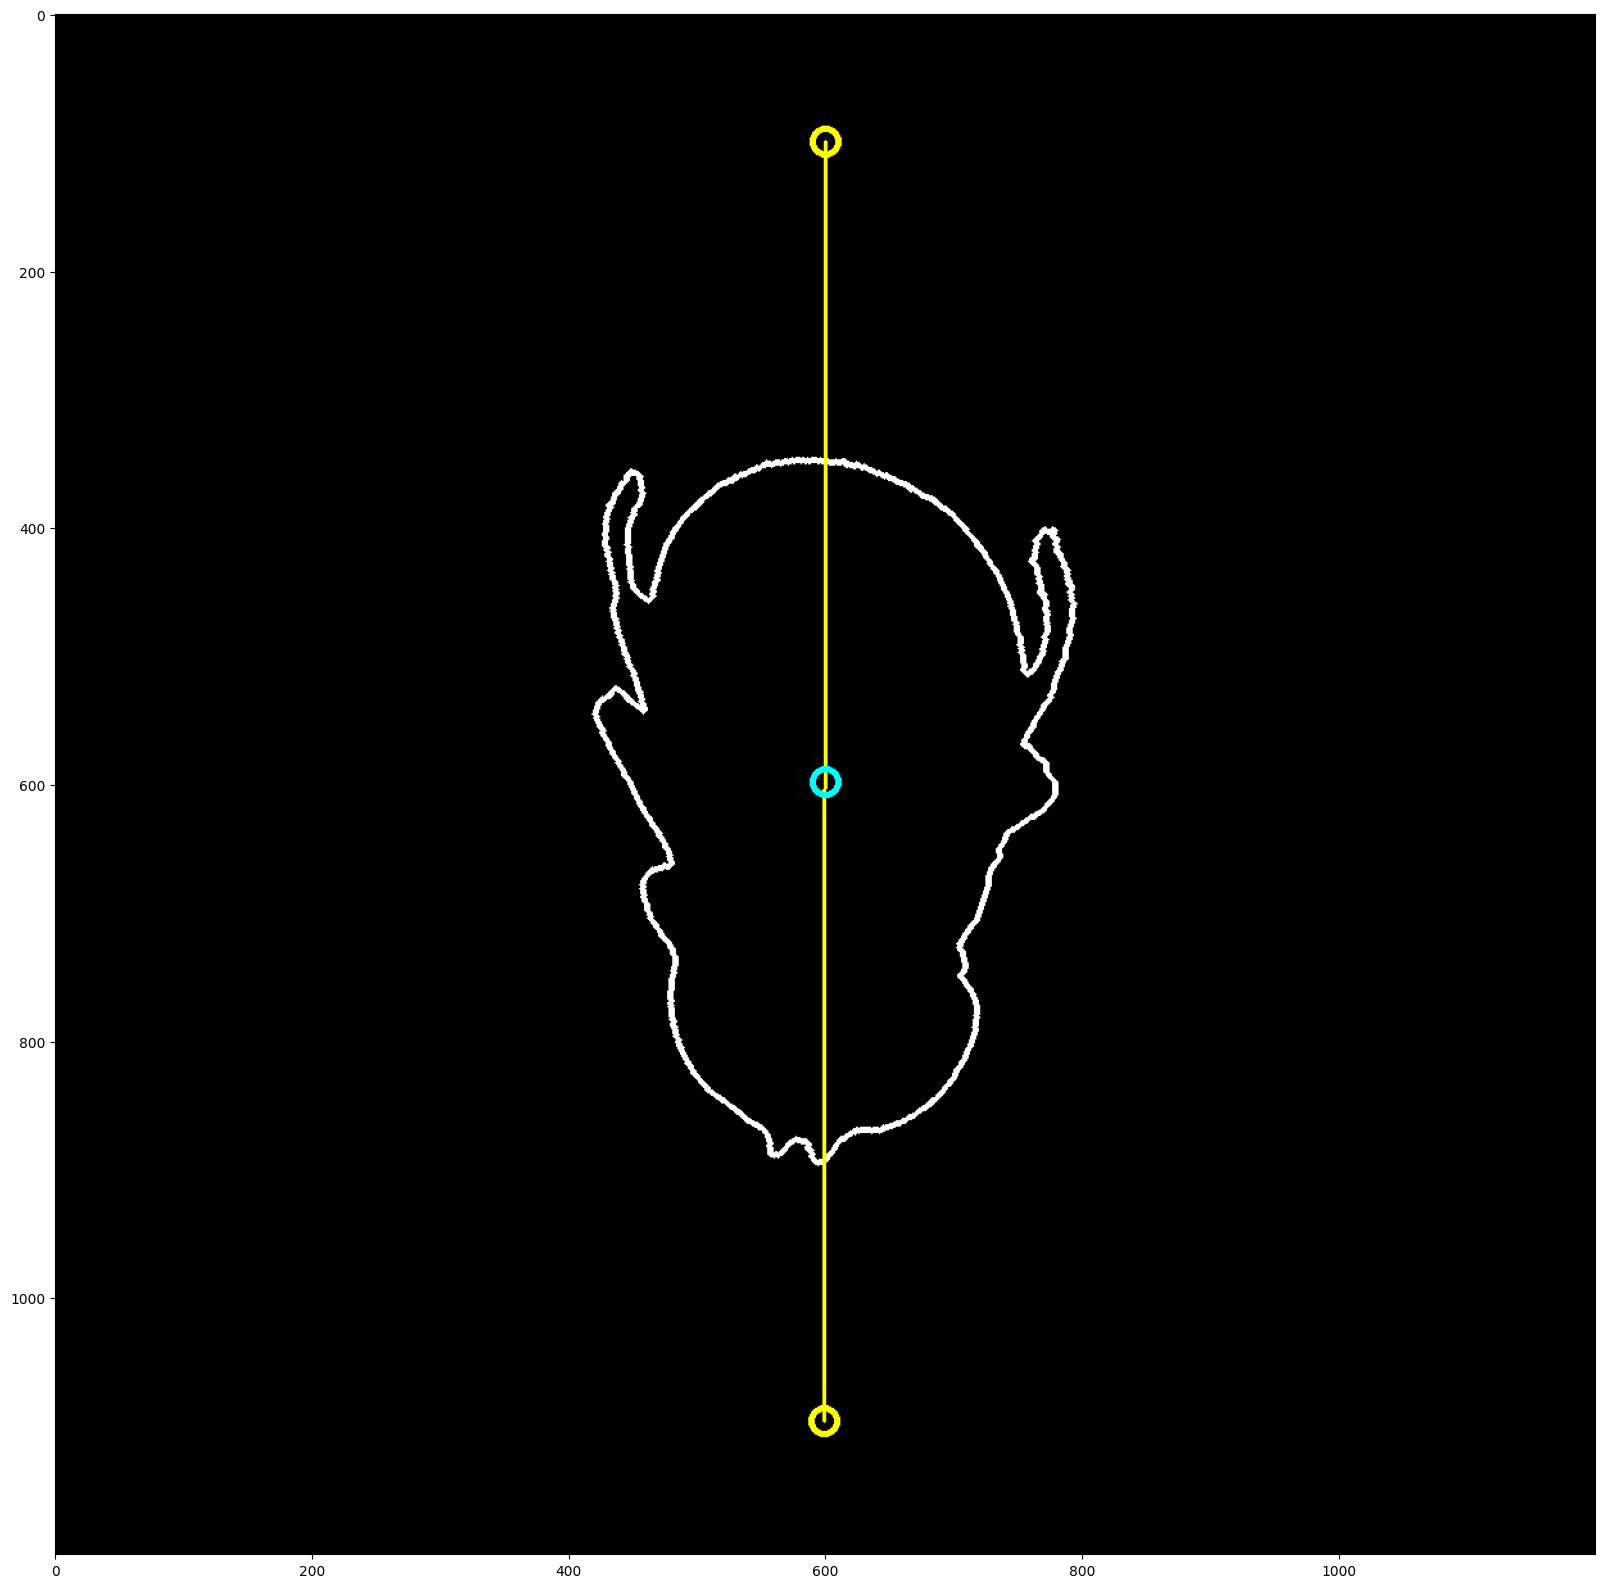

In [3]:
plt.figure(figsize=(20,20))
mask_fly = get_objectmask(fly_mask_hrz,max_contour_hrz)

cv2.circle(mask_fly,body_axis_pt_0_hrz,10, color = (255,255,0),thickness =3)
cv2.circle(mask_fly,body_axis_pt_1_hrz,10, color = (255,255,0),thickness =3)
cv2.line(mask_fly,body_axis_pt_0_hrz,body_axis_pt_1_hrz,color = (255,255,0), thickness = 2)
cv2.circle(mask_fly,centroid_hrz,10,color = (0,255,255),thickness=3)
plt.imshow(mask_fly)

In [ ]:
# single_image_save(file_name,display=True)

In [ ]:
# Comparing two different images with otsu threshold
two_image_save_Otsu('imgs/20231121124749_0061.png','imgs/20231121124749_0071.png',"Female at 60s","Female at 71s", display=True)

In [ ]:
# Comparing two images
two_image_save('imgs/20231121124749_0061.png','imgs/20231121124749_0071.png',"Female at 60s","Female at 71s", display=True)

In [ ]:
# Comparing two different images with otsu threshold
two_image_save_Otsu('imgs/20231227131157_0007.png','imgs/20231227125957_0132.png',"Male","Female", display=True)

In [ ]:
# Comparing two images
two_image_save('imgs/20231227131157_0007.png','imgs/20231227125957_0132.png',"Male","Female",display=True)

Step 1: Access contour for an image 

In [ ]:
fly_mask, max_contour,centroid, body_axis_pt_0,body_axis_pt_1 = get_contour_centroid(file_name)
fly_mask_adj, max_contour_adj,centroid_adj, body_axis_pt_0_adj,body_axis_pt_1_adj,unrot_vec  = contour_rot_matrix(file_name)
fly_mask_orig, fly_mask_hrz,max_contour_hrz,centroid_hrz, body_axis_pt_0_hrz,body_axis_pt_1_hrz, angle_og, angle_rot = contour_hrz_matrix(file_name)

print(max_contour, centroid, body_axis_pt_0, body_axis_pt_1)
plt.imshow(fly_mask)

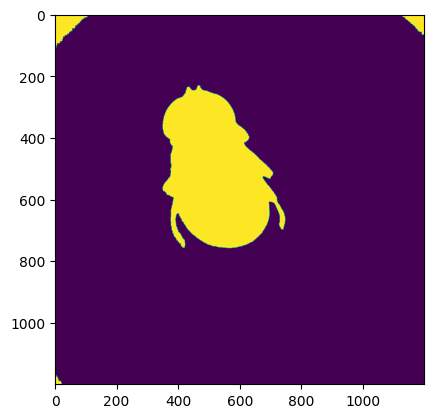

In [5]:
plt.imshow(fly_mask_adj)

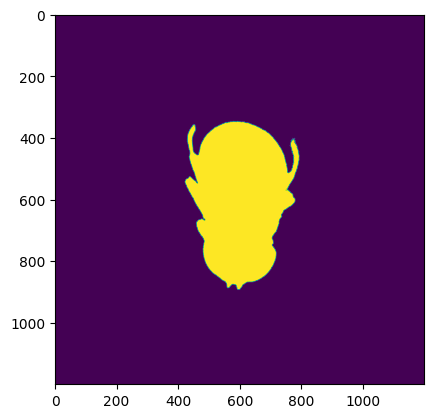

In [6]:
plt.imshow(fly_mask_hrz)

#### Step 2: Rotate the image so it is at least centered up down on the y axis

In [7]:
x1 = body_axis_pt_0[0]
x2 =body_axis_pt_1[0]
y1 = body_axis_pt_0[1]
y2 =body_axis_pt_1[1]
m = (y2 - y1)/(x2-x1)
print(m)
# y = mx+b
b = y1 - m*x1
print(b)

x = np.linspace(x1,x2+1, num = len(max_contour))
y = m*x + b
print(y)
points = []
for i in range(len(x)):
    points.append((int(x[i]),int(y[i])))
print(points)

3.0063694267515926
-1044.3057324840765
[988.         987.51867333 987.03734667 ...  47.96902276  47.48769609
  47.00636943]
[(676, 988), (675, 987), (675, 987), (675, 986), (675, 986), (675, 985), (675, 985), (674, 984), (674, 984), (674, 983), (674, 983), (674, 982), (674, 982), (673, 981), (673, 981), (673, 980), (673, 980), (673, 979), (673, 979), (672, 978), (672, 978), (672, 977), (672, 977), (672, 976), (672, 976), (671, 975), (671, 975), (671, 975), (671, 974), (671, 974), (671, 973), (671, 973), (670, 972), (670, 972), (670, 971), (670, 971), (670, 970), (670, 970), (669, 969), (669, 969), (669, 968), (669, 968), (669, 967), (669, 967), (668, 966), (668, 966), (668, 965), (668, 965), (668, 964), (668, 964), (667, 963), (667, 963), (667, 962), (667, 962), (667, 962), (667, 961), (667, 961), (666, 960), (666, 960), (666, 959), (666, 959), (666, 958), (666, 958), (665, 957), (665, 957), (665, 956), (665, 956), (665, 955), (665, 955), (664, 954), (664, 954), (664, 953), (664, 953),

In [10]:
print(max_contour.shape, len(max_contour))
print(len(max_contour.reshape(-1,2)))
a = max_contour.reshape(-1,2)
print(a.shape)
print(np.ones((a.shape[0],2)).shape)

(1956, 1, 2) 1956
1956
(1956, 2)
(1956, 2)


In [11]:
import copy
intersect_orig = []
for p in range(len(points)):
    for v in range(len(max_contour)):
        # print(points[p], tuple(max_contour[v][0]))
        if points[p] == tuple(max_contour[v][0]):
            print("True")
            intersect_orig.append((p,v))
print(intersect_orig)
intersect = copy.deepcopy(intersect_orig)
for val in range(1, len(intersect_orig)):
    if np.abs(intersect_orig[val][0] - intersect_orig[val-1][0]) < 20:
        # if the difference is less than 20 then drop the second one
        intersect.remove(intersect_orig[val])
        print(intersect, intersect_orig)
print(intersect)

True
True
True
True
True
True
[(487, 1026), (1550, 58), (1551, 58), (1552, 57), (1553, 57), (1554, 57)]
[(487, 1026), (1550, 58), (1552, 57), (1553, 57), (1554, 57)] [(487, 1026), (1550, 58), (1551, 58), (1552, 57), (1553, 57), (1554, 57)]
[(487, 1026), (1550, 58), (1553, 57), (1554, 57)] [(487, 1026), (1550, 58), (1551, 58), (1552, 57), (1553, 57), (1554, 57)]
[(487, 1026), (1550, 58), (1554, 57)] [(487, 1026), (1550, 58), (1551, 58), (1552, 57), (1553, 57), (1554, 57)]
[(487, 1026), (1550, 58)] [(487, 1026), (1550, 58), (1551, 58), (1552, 57), (1553, 57), (1554, 57)]
[(487, 1026), (1550, 58)]


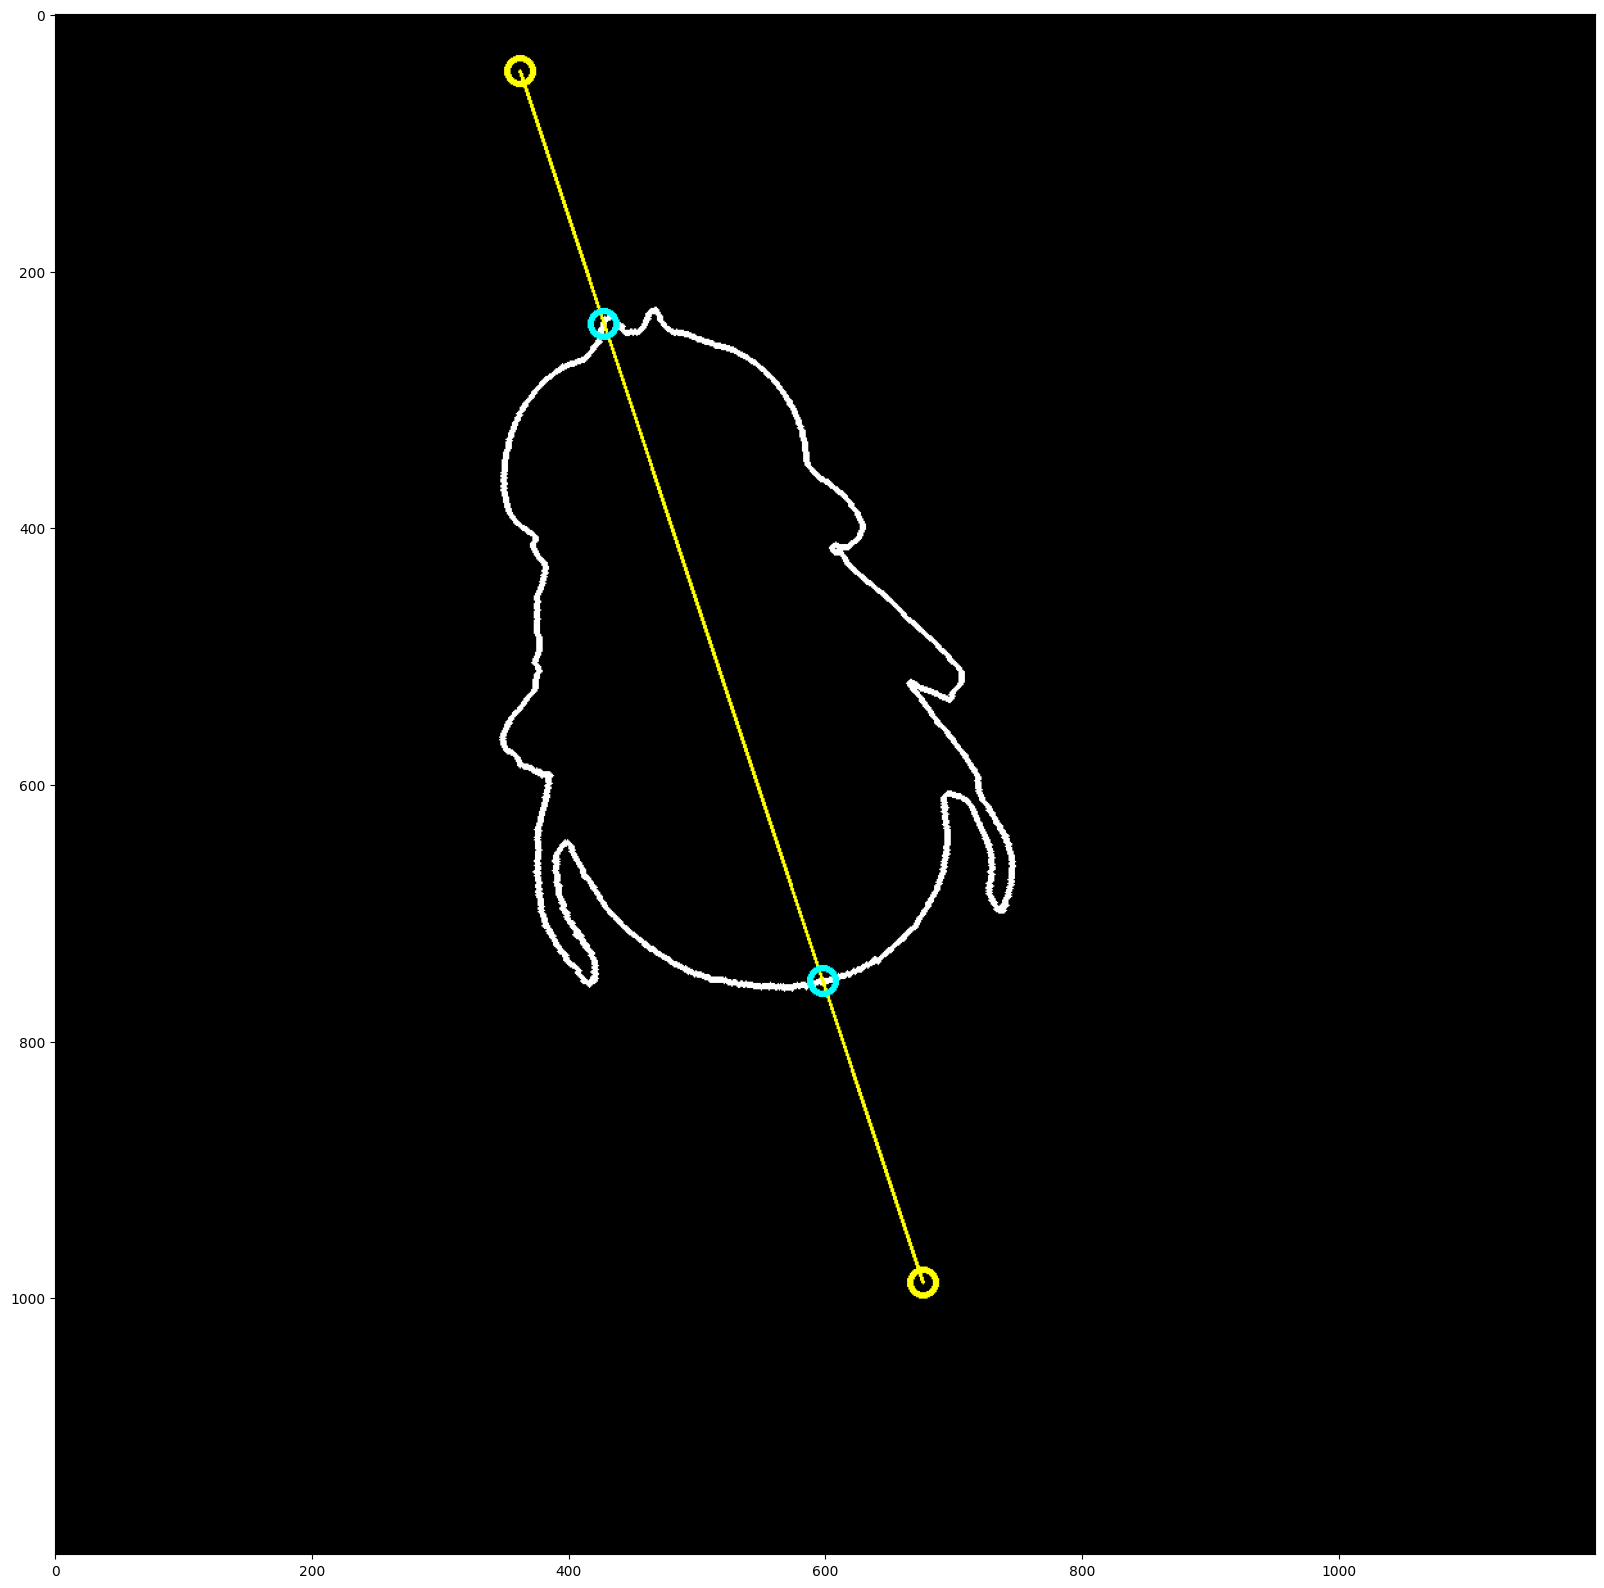

In [14]:
plt.figure(figsize=(20,20))
mask_fly = get_objectmask(fly_mask,max_contour)

cv2.circle(mask_fly,(body_axis_pt_0),10, color = (255,255,0),thickness =3)
cv2.circle(mask_fly,(body_axis_pt_1),10, color = (255,255,0),thickness =3)
cv2.line(mask_fly,body_axis_pt_0,body_axis_pt_1,color = (255,255,0), thickness = 2)


cv2.circle(mask_fly,(max_contour[intersect[0][1]][0]),10, color = (0,255,255),thickness =3 )

cv2.circle(mask_fly,(max_contour[intersect[1][1]][0]),10, color = (0,255,255),thickness =3 )
plt.imshow(mask_fly)

## Method 2a: Working Version - Analysis of Image
- This method allows for an analysis of the image and defining various lines for the purpose of visualizing the differences in the fly shape
- This method may be used in the future in constructing lighter weight detectors....

What is being performed:
- Generates the midline
- Creates buffer line
- and parallel lines on the buffer with respect to the midline
- finds the intersection points of the parallel lines on the buffer to the contour...
- Finds the range of points in the contour
- Has an undefined line representing centerline that is in line with the y-axis
- able to access the contours and ext.

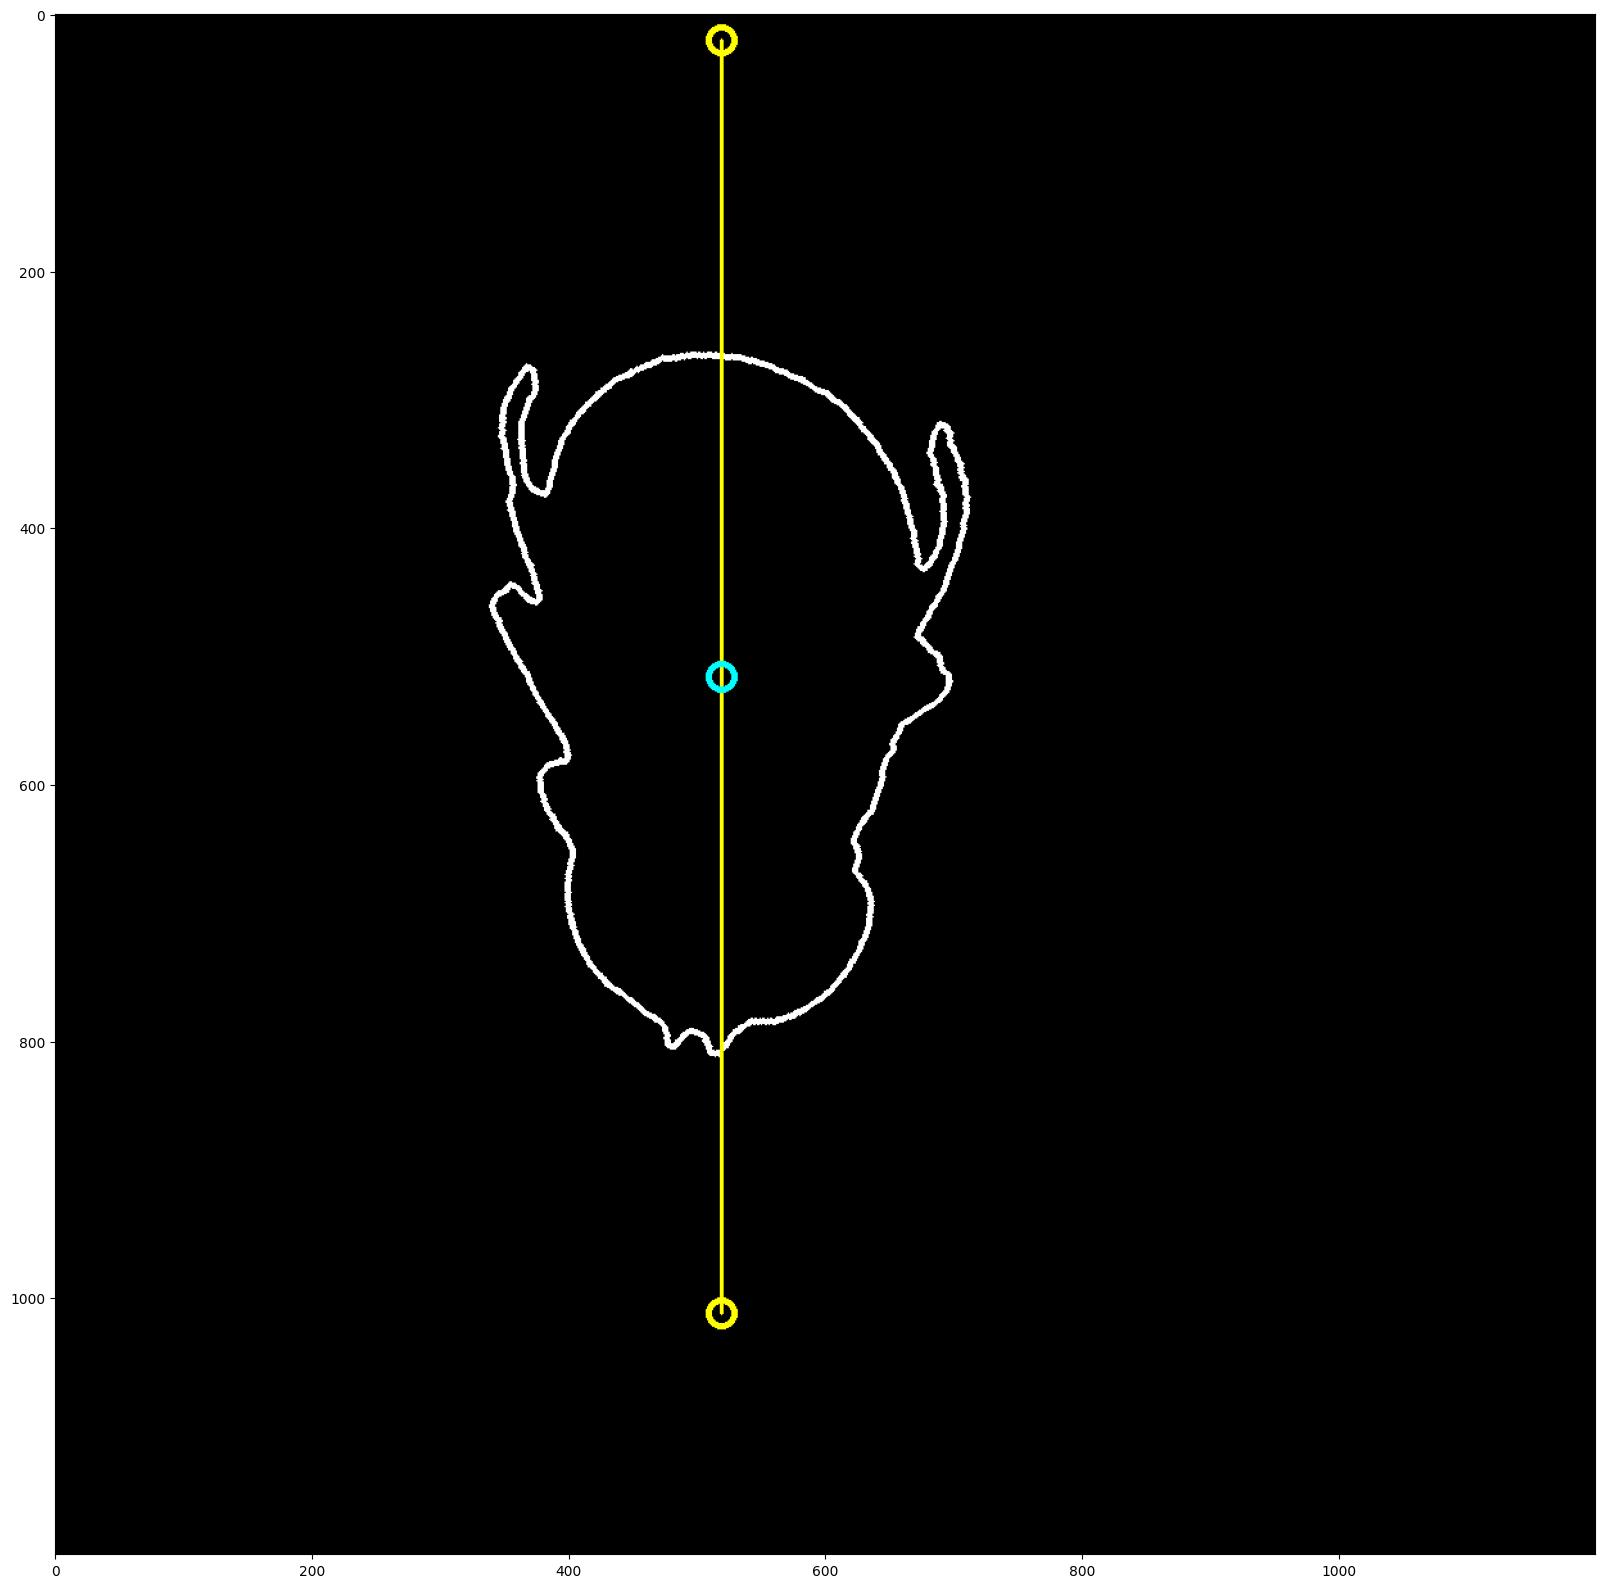

In [15]:
plt.figure(figsize=(20,20))
mask_fly = get_objectmask(fly_mask_adj,unrot_vec)

cv2.circle(mask_fly,body_axis_pt_0_adj,10, color = (255,255,0),thickness =3)
cv2.circle(mask_fly,body_axis_pt_1_adj,10, color = (255,255,0),thickness =3)
cv2.line(mask_fly,body_axis_pt_0_adj,body_axis_pt_1_adj,color = (255,255,0), thickness = 2)
# for p in points:
#     cv2.circle(mask_fly,(p),10, color = (255,255,255),thickness =1)

cv2.circle(mask_fly,centroid_adj,10,color = (0,255,255),thickness=3)
plt.imshow(mask_fly)

### Draw the Buffer Line

- [`X`] Draw a line of fixed width X across the centroid 

- [ `X`] Using this line also draw lines that are parallel to the centerline up and down

- [ `X` ] Then plot the points at which it intersects on the fly

- [   ] After this point We will be able to get contour sections from top and bottom. 

- [   ] These will then be plotted in two different orientations.

- [   ] In this method after we have plotted in two different orientations then the user will deciede which is top and which is bottom. In the future we will utilize.


#### Checked if the centerline is undefined

In [16]:
x1 = body_axis_pt_0_adj[0]
x2 = body_axis_pt_1_adj[0]
y1 = body_axis_pt_0_adj[1]
y2 =body_axis_pt_1_adj[1]

print(x1,x2)
if (x2-x1 ) == 0:
    print("undefined")
elif (y2-y1) == 0 :
    print(f"Horizontal line at y = {y1}")
else:
    print(x2-x1)
    print(y2-y1)
    m = (y2 - y1)/(x2-x1)
    print(m)
    print(f"centroid {centroid_adj}")

519 519
undefined


#### 1. Draw Line of Fixed width across centroid

Fixed Width will start with 100px


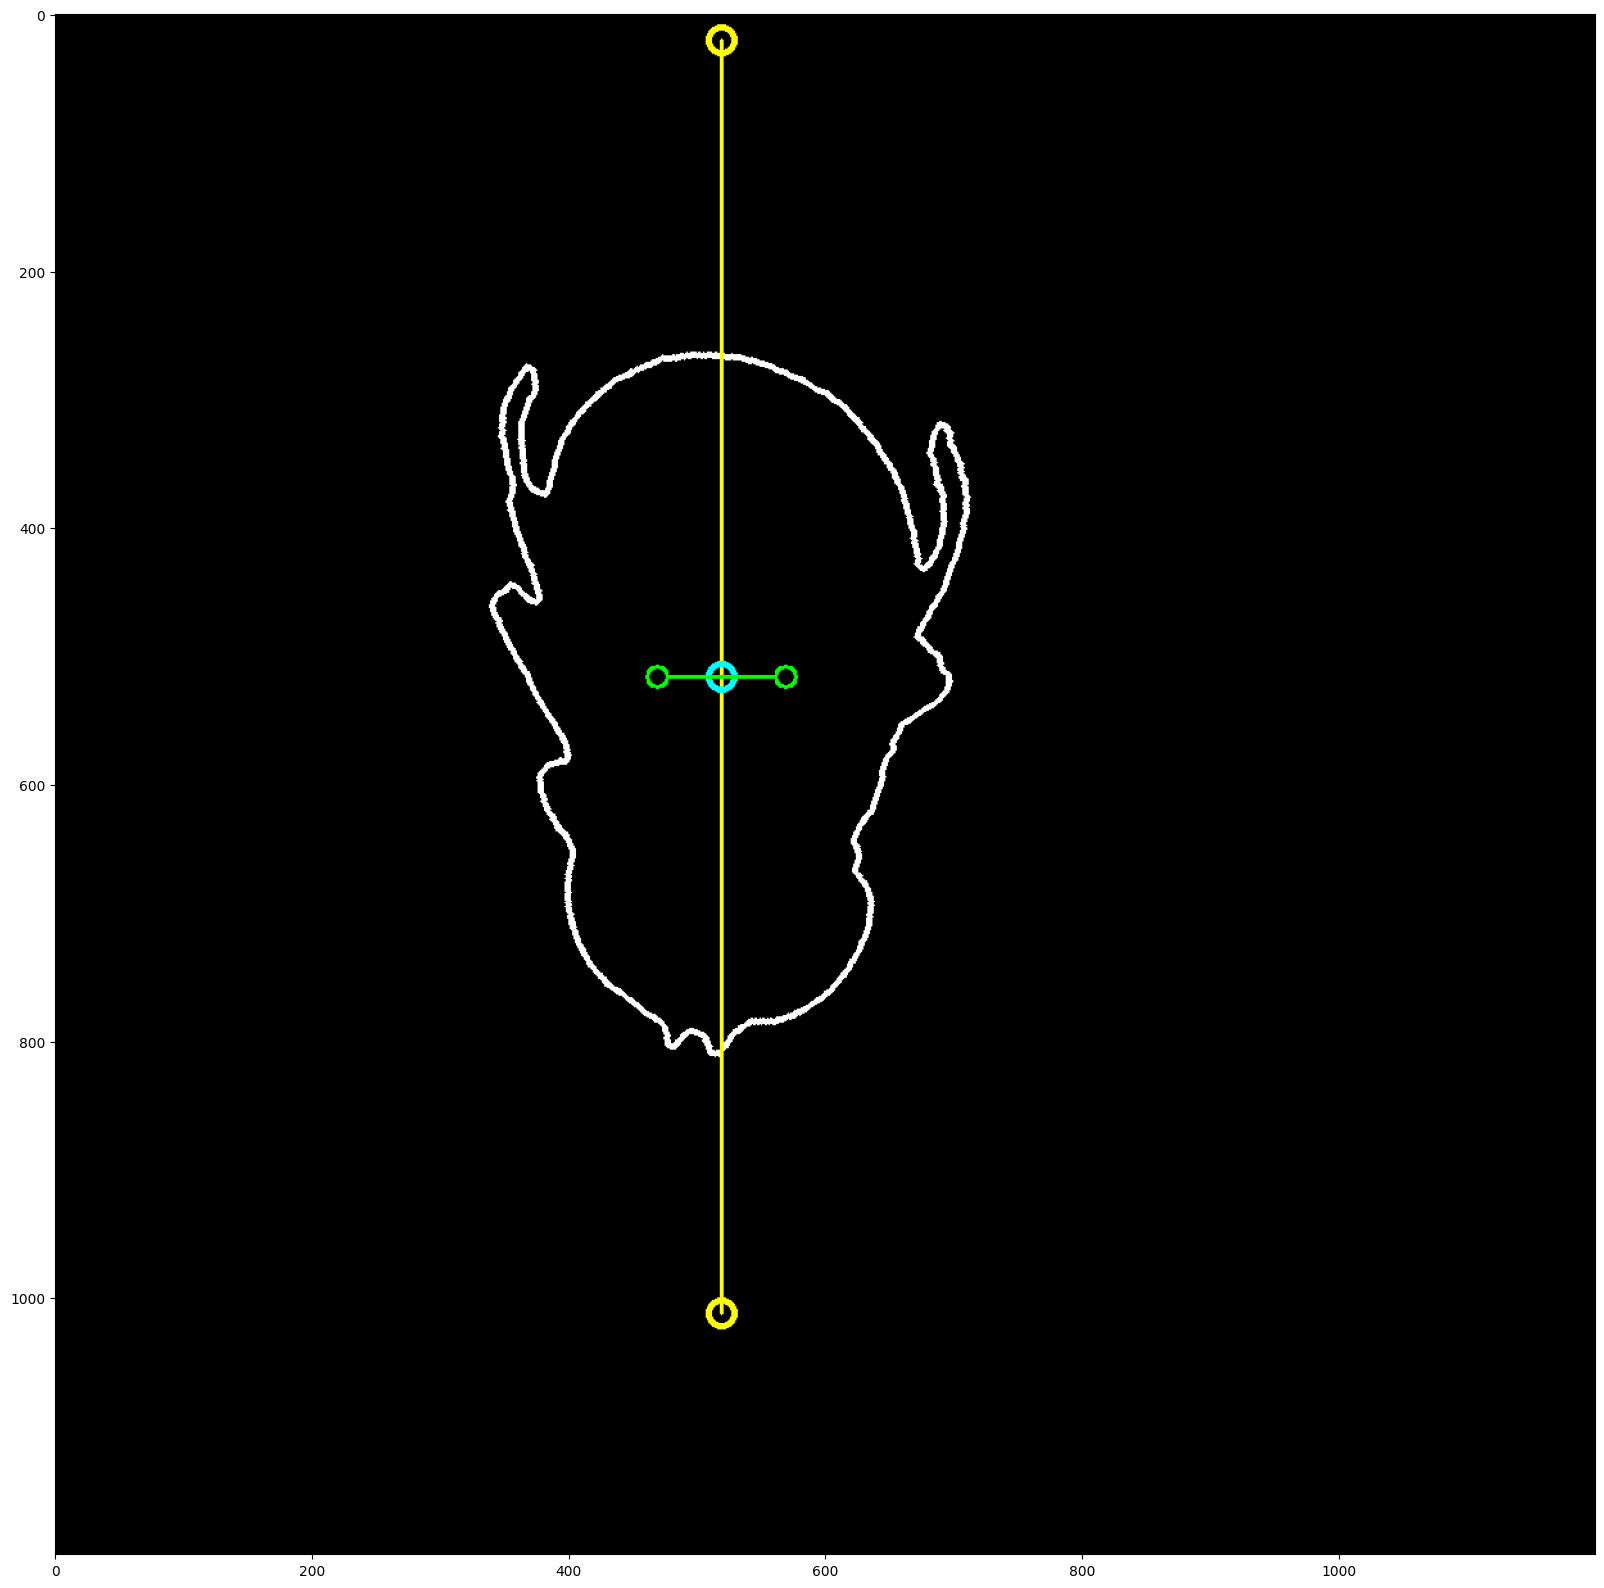

In [17]:
plt.figure(figsize=(20,20))
mask_fly1 = copy.deepcopy(mask_fly)
## Point 1: 50 points to right
p1 = (centroid_adj[0] + 50, centroid_adj[1])
## Point 2: 50 points to left
p2 = (centroid_adj[0] - 50,centroid_adj[1])
cv2.circle(mask_fly1,p1,8, color = (0,255,0),thickness =2)
cv2.circle(mask_fly1,p2,8, color = (0,255,0),thickness =2)
# cv2.circle(mask_fly1,(800,500),8,color = (0,255,255),thickness =2) # test
cv2.line(mask_fly1,(p1[0]-8,p1[1]),(p2[0]+8,p2[1]),color = (0,255,0), thickness = 2)
plt.imshow(mask_fly1)

#### 2. Draw Parallel Lines From p1 and p2 until intersection with top and bottom of object contour

In [18]:
## 
def parallel_lines(point1,point2,centroid,body_axis_pt_0,body_axis_pt_1,max_contour,width = 50):
    """
    Using two points and centroid determine two lines that are parallel 
    to the centroid's centerline. Returns a tuple of two arrays describing the parallel
    lines.

    Parameters:
    -----------
    point1 : tuple
        describes the x,y pixel location of a point located 50px to right of centroid
    point2 : tuple
        describes the x,y pixel location of a point located 50px to the left of centroid
    
    Returns:
    --------
    par1 : array
        array of points for parallel line interesecting point 1
    par2 : array
        array of points for parallel line intersecting point 2
    """
    # get the range of points needed
    len_list = len(max_contour)

    # point 1: left of centroid
    ## y1 and y2 for point 1 ... X width from body_axis_pt_0
    print(body_axis_pt_0[0])
    point1_y1 = body_axis_pt_0[1] 
    point1_y2 = body_axis_pt_1[1] 
    
    # Point 2: right of centroid 
    ## y1 and y2 for point 2 ... X width to the right of the centroid
    point2_y1 = body_axis_pt_0[1]
    point2_y2 = body_axis_pt_1[1] 

    # Point 1 and Point 2 - y values
    ## X values for these points will remain the same
    point1_x_u = np.full(1200,p1[0])
    point1_x_d = np.full(1200,p1[0])
    point2_x_u= np.full(1200,p2[0])
    point2_x_d= np.full(1200,p2[0])

    # get the array for point 1
    
    yvalu1 = np.linspace(min([point1_y1,point1_y2,0]),centroid[1]+1,num = 1200)
    up1 = np.column_stack((point1_x_u,yvalu1)).astype(int)
    yvald1 = np.linspace(centroid[1],max(point1_y1,point1_y2)+1,num = 1200)
    down1 = np.column_stack((point1_x_d,yvald1)).astype(int)
    # arr_1 = np.concatenate(a1,b1)
    # get the array for point 2
    yvalu2 = np.linspace(min([point2_y1,point2_y2,0]),centroid[1]+1,num = 1200)
    up2 = np.column_stack((point2_x_u,yvalu2)).astype(int)
    yvald2 = np.linspace(centroid[1],max(point2_y1,point2_y2)+1,num =1200)
    down2= np.column_stack((point2_x_d,yvald2)).astype(int)
    # arr_2 = np.concatenate(a2,b2)

    return  yvalu1, up1,down1,up2,down2

def intersect_up(arr_min,max_contour):
    """
    Takes array ordered from min y value

    Returns:
    -------
    inter_up : list
        list of the point or points where the max contour intersections with the array...
    """
    ## Starts from end of array aka centroid and goes in looking at intersections...
    ### This is to avoid any initial intersections at the start..
    inter_up = [ ]
    ## Reverse the array
    arr_min = arr_min[::-1] # so will go from the centroid now until the end
    for p in range(len(arr_min)):
        for v in range(len(max_contour)):
            # print(arr_min[p], tuple(max_contour[v][0])[1])
            # print(tuple(arr_min[p]),tuple(max_contour[v][0]))

            if tuple(arr_min[p]) == tuple(max_contour[v][0]):
                # print("True")
                inter_up.append((p,v))

    # for p in range(len(points)):
    #     for v in range(len(max_contour)):
    #         # print(points[p], tuple(max_contour[v][0]))
    #         if points[p] == tuple(max_contour[v][0]):
    #             print("True")
    #             intersect_orig.append((p,v))
    # print(inter_up)
    intersect = copy.deepcopy(inter_up)
    for val in range(1, len(inter_up)):
        if np.abs(inter_up[val][1] - inter_up[val-1][1]) < 20:
            # if the difference is less than 20 then drop the second one
            intersect.remove(inter_up[val])
            print(intersect, inter_up)
    # print(intersect)
    print("point from array")
    print(arr_min[intersect[0][0]])
    print("point from contour:")
    print(max_contour[0][0][1])
    ## Return the point to plot from array...should be same regardless just need the coordinates...
    return arr_min[intersect[0][0]]
    ## check on if captured two intersections at same location..
    ### gets rid of second one
def intersect_down(arr_max, max_contour):
    """
    Takes array ordered from centroid to max...

    Returns:
    -------
    inter_up : list
        list of the point or points where the max contour intersections with the array...
    """
    ## Starts from end of array aka centroid and goes in looking at intersections...
    ### This is to avoid any initial intersections at the start..
    inter_up = [ ]
    ## Reverse the array
    for p in range(len(arr_max)):
        for v in range(len(max_contour)):
            # print(arr_min[p], tuple(max_contour[v][0])[1])
            # print(tuple(arr_min[p]),tuple(max_contour[v][0]))

            if tuple(arr_max[p]) == tuple(max_contour[v][0]):
                # print("True")
                inter_up.append((p,v))

    # for p in range(len(points)):
    #     for v in range(len(max_contour)):
    #         # print(points[p], tuple(max_contour[v][0]))
    #         if points[p] == tuple(max_contour[v][0]):
    #             print("True")
    #             intersect_orig.append((p,v))
    # print(inter_up)
    intersect = copy.deepcopy(inter_up)
    for val in range(1, len(inter_up)):
        if np.abs(inter_up[val][1] - inter_up[val-1][1]) < 20:
            # if the difference is less than 20 then drop the second one
            intersect.remove(inter_up[val])
            print(intersect, inter_up)
    # print(intersect)
    print("point from array")
    print(arr_max[intersect[0][0]])
    print("point from contour:")
    print(max_contour[0][0][1])
    ## Return the point to plot from array...should be same regardless just need the coordinates...
    return arr_max[intersect[0][0]]
     

def find_intersection(arr1,arr2,maxcontour):
    """
    With two arrays of points compare with the points of the contour to detemrine the locations of intersection

    First find intersections going in opposite direction...

    Then find intersections going

    """
    intersect_up = []


    intersect_down = []
    pass
yvalu1, up1,down1,up2,down2 = parallel_lines(p1,p2,centroid_adj,body_axis_pt_0_adj,body_axis_pt_1_adj,unrot_vec)
# print(up1[::-1])
# print(up1)
inter_up_pnt1 = intersect_up(up1,unrot_vec)
inter_down_pnt1 = intersect_down(down1, unrot_vec)

# print(up2)
inter_up_pnt2 = intersect_up(up2,unrot_vec)

inter_down_pnt2 = intersect_down(down2,unrot_vec)

# xvals = [unrot_vec[i][0][0] for i in range(len(unrot_vec))]
# print(xvals)

# a = np.where(np.array(xvals) == 624)



    
    


519
[(550, 938)] [(550, 938), (551, 938)]
point from array
[569 279]
point from contour:
804
[(642, 109), (644, 109)] [(642, 109), (643, 109), (644, 109)]
[(642, 109)] [(642, 109), (643, 109), (644, 109)]
point from array
[569 782]
point from contour:
804
[(571, 1038)] [(571, 1038), (572, 1038)]
point from array
[469 270]
point from contour:
804
[(645, 1853)] [(645, 1853), (646, 1853)]
point from array
[469 783]
point from contour:
804


In [20]:
# take the 30 contour points to the lefts and right of the two intersections and plot
# adj_intersect = [(intersect[0][1]+50,intersect[0][1]-50),(intersect[1][1]+50,intersect[1][1]-50)]
# print(adj_intersect)

[(1076, 976), (108, 8)]


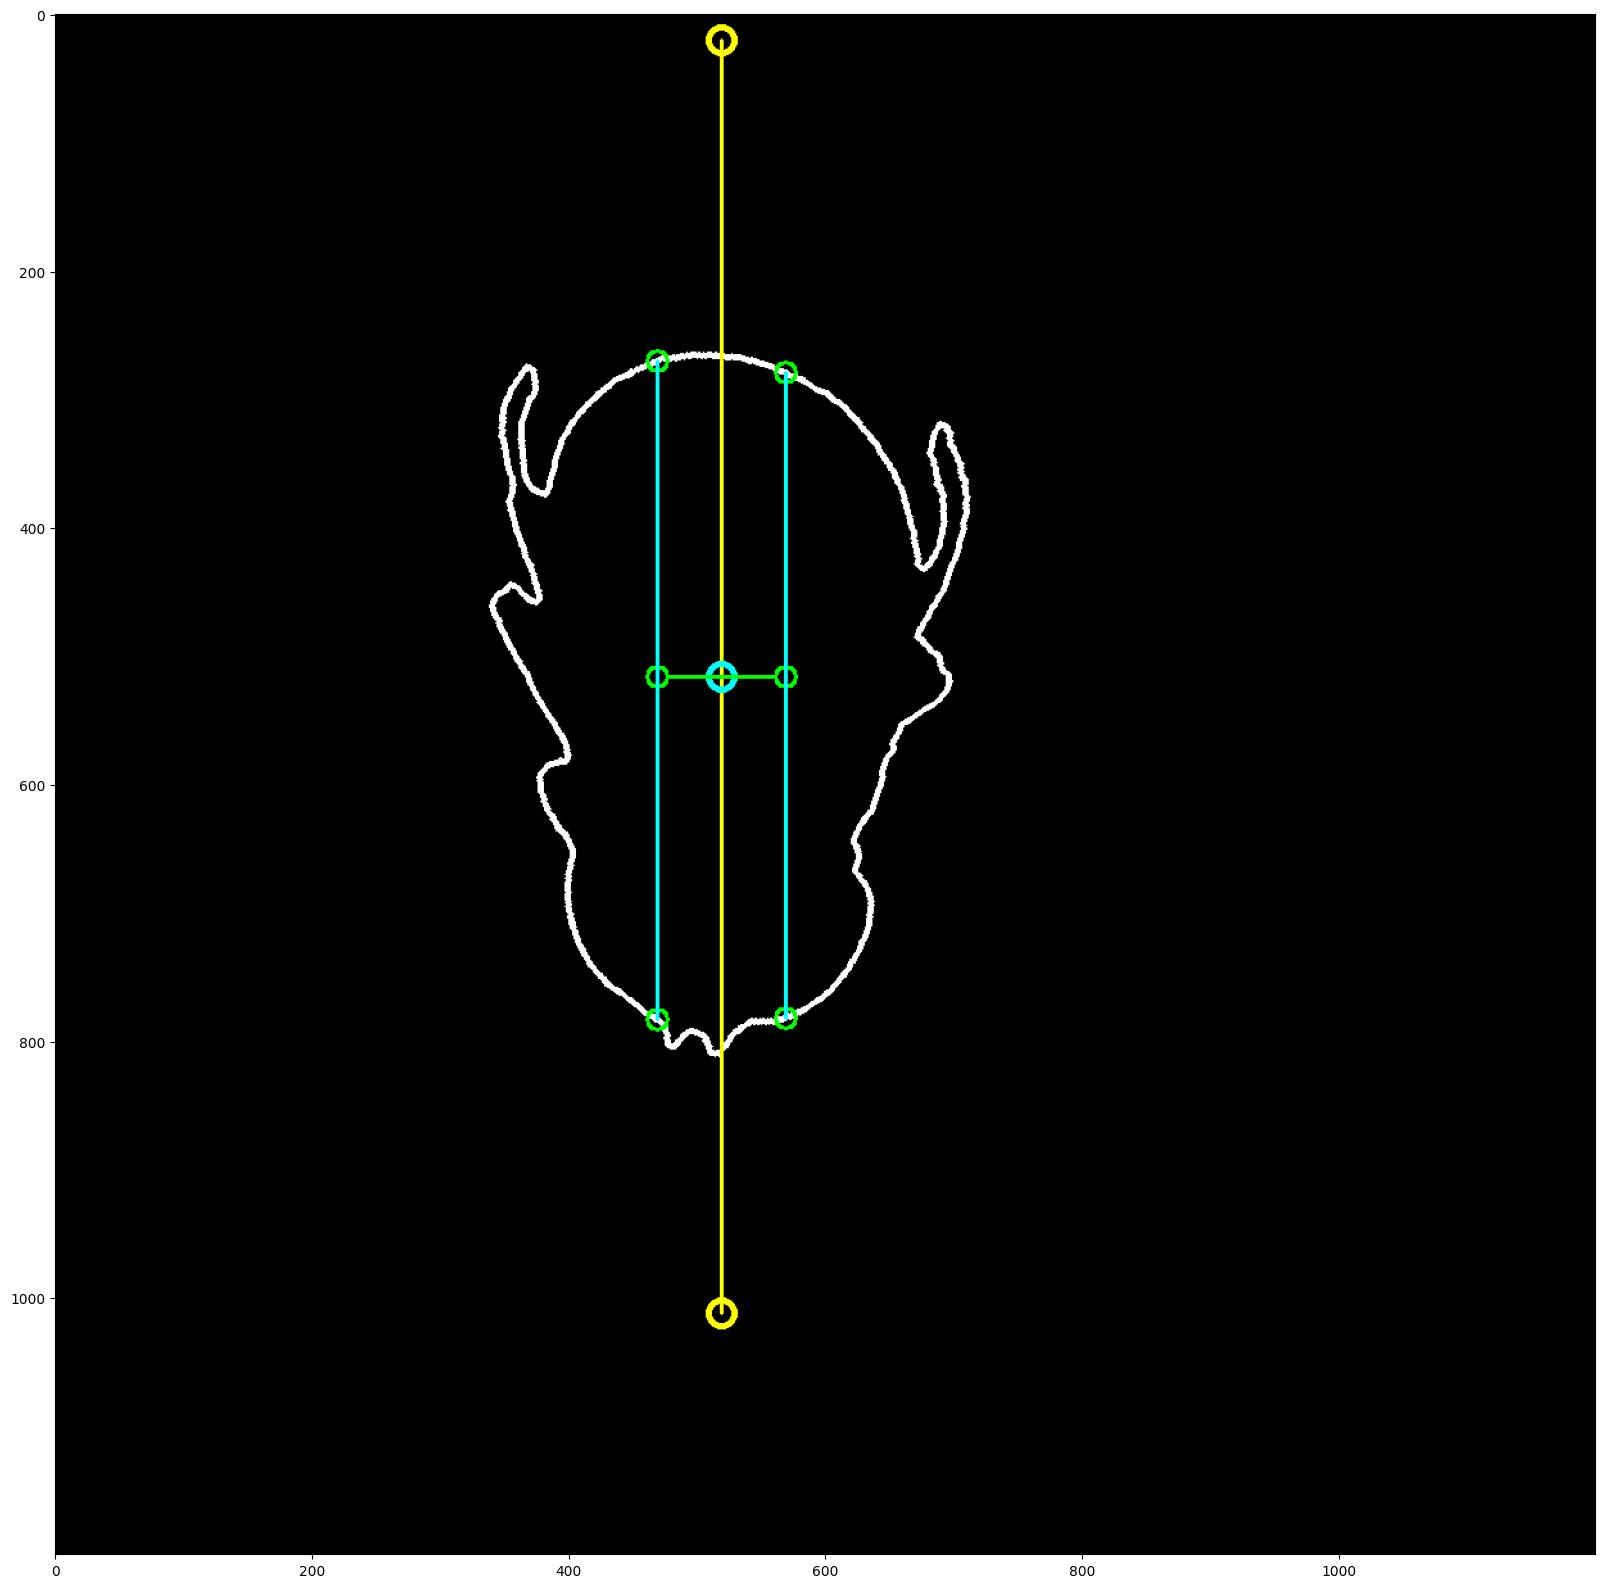

In [21]:
plt.figure(figsize=(20,20))
mask_fly2 = copy.deepcopy(mask_fly1)
# Point 1 lines
cv2.circle(mask_fly2,tuple(inter_up_pnt1),8, color = (0,255,0),thickness =2)
cv2.circle(mask_fly2,tuple(inter_down_pnt1),8, color = (0,255,0),thickness =2)
cv2.line(mask_fly2,tuple(inter_up_pnt1),tuple(inter_down_pnt1),color = (0,255,255), thickness = 2)
# Point 2 Lines
cv2.circle(mask_fly2,tuple(inter_up_pnt2),8, color = (0,255,0),thickness =2)
cv2.circle(mask_fly2,tuple(inter_down_pnt2),8, color = (0,255,0),thickness =2)
# cv2.circle(mask_fly2,unrot_vec[490][0],8, color = (0,255,0),thickness =2)
# cv2.circle(mask_fly2,unrot_vec[2146][0],8, color = (0,255,0),thickness =2)
cv2.line(mask_fly2,inter_up_pnt2,tuple(inter_down_pnt2),color = (0,255,255), thickness = 2)

plt.imshow(mask_fly2)




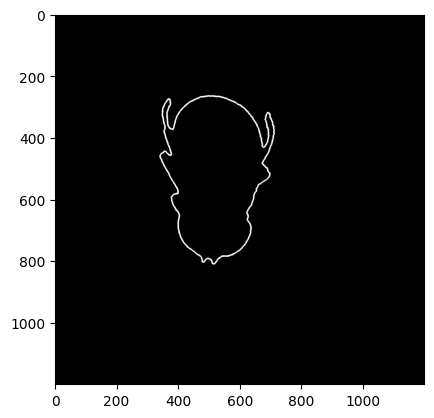

In [22]:
mask_fly = get_objectmask(fly_mask_adj,unrot_vec)
plt.imshow(mask_fly)

## Method: Moments

519
900


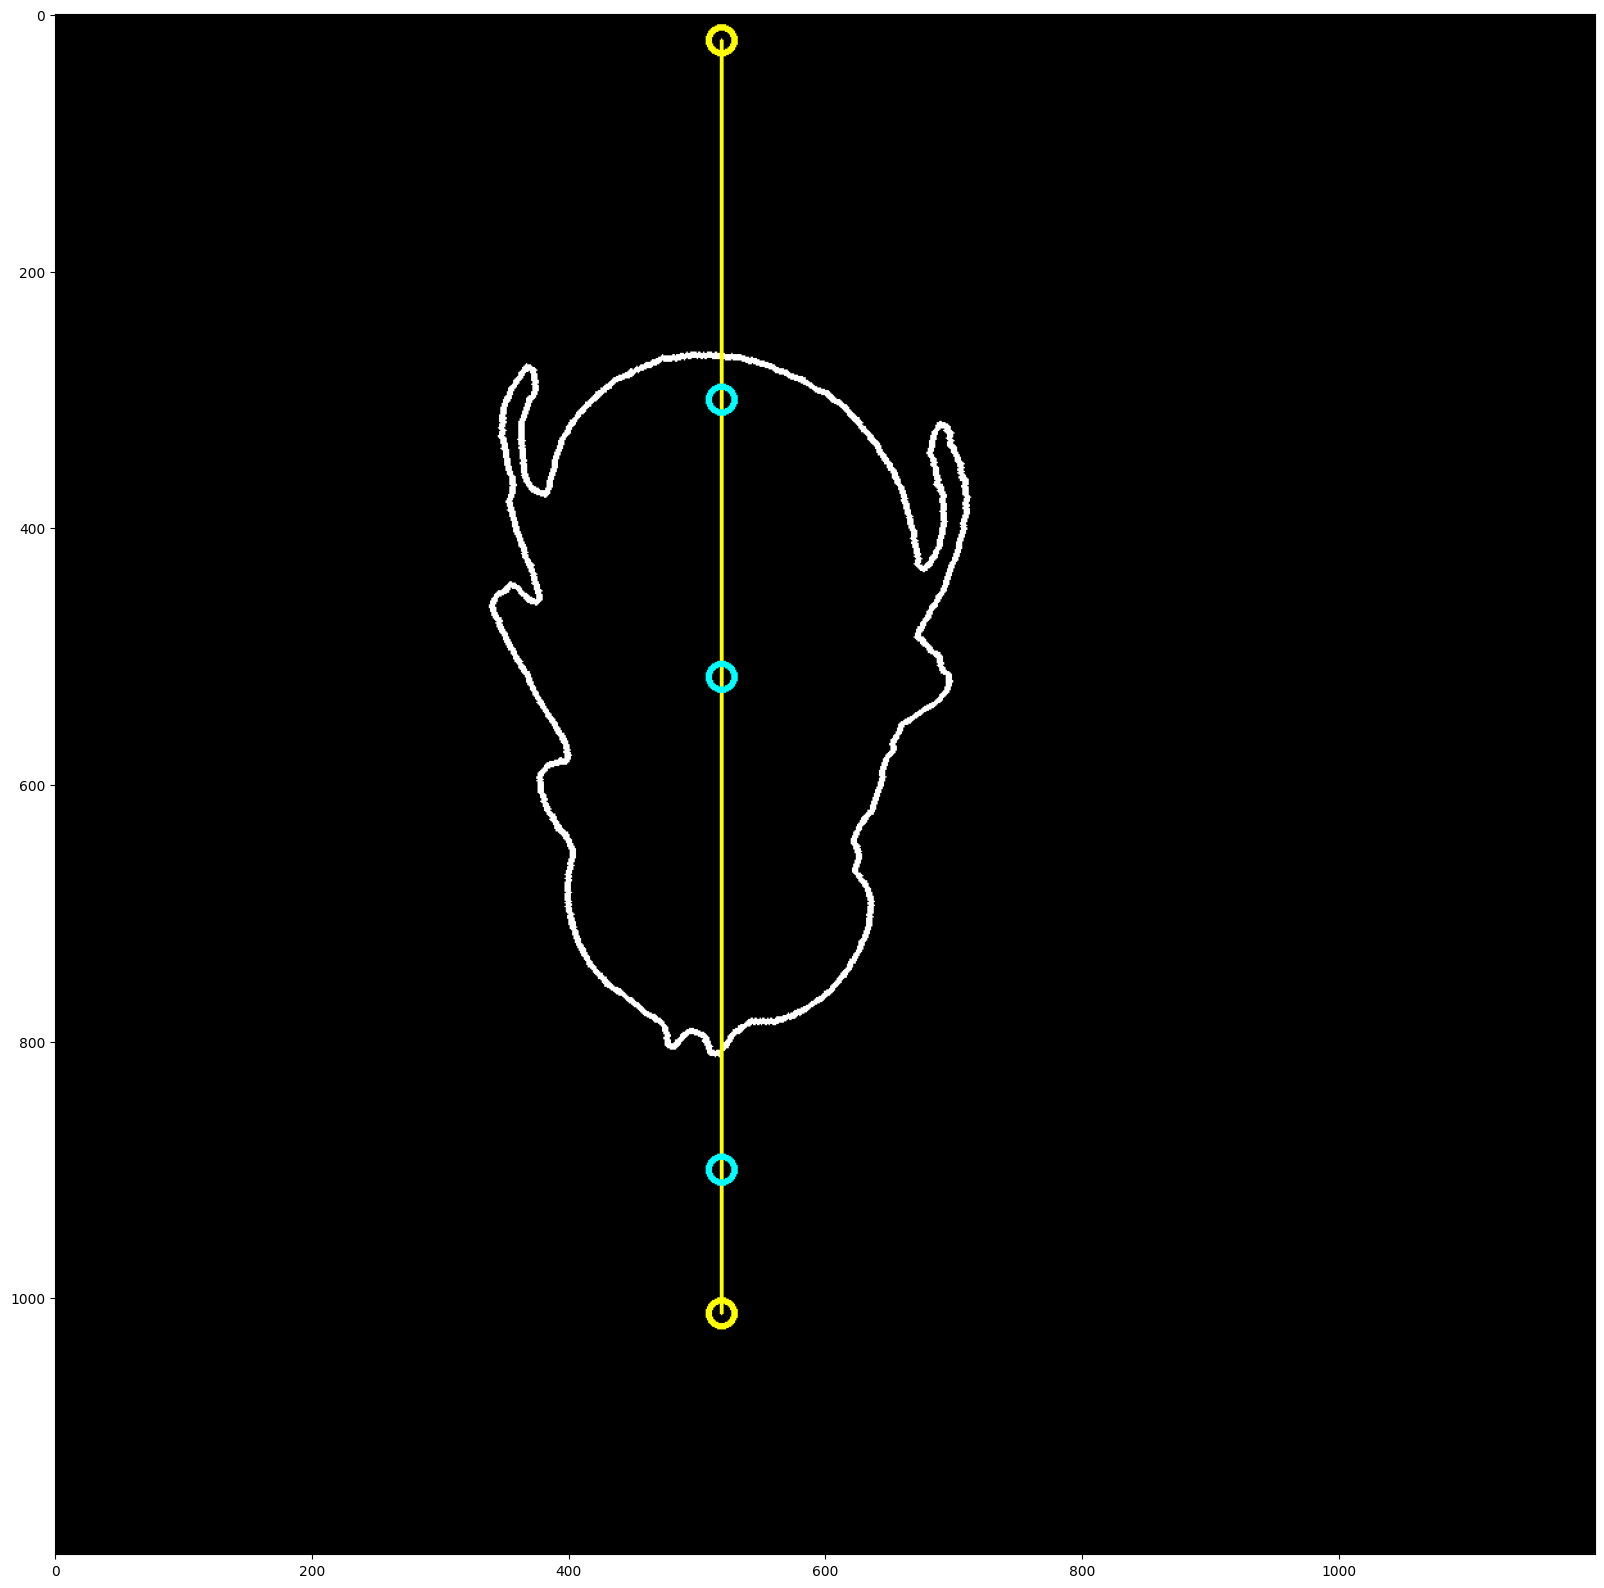

In [23]:
plt.figure(figsize=(20,20))
mask_fly = get_objectmask(fly_mask_adj,unrot_vec)

cv2.circle(mask_fly,body_axis_pt_0_adj,10, color = (255,255,0),thickness =3)
cv2.circle(mask_fly,body_axis_pt_1_adj,10, color = (255,255,0),thickness =3)
cv2.line(mask_fly,body_axis_pt_0_adj,body_axis_pt_1_adj,color = (255,255,0), thickness = 2)
# for p in points:
#     cv2.circle(mask_fly,(p),10, color = (255,255,255),thickness =1)
# First Quarter
quart1_x, quart1_y = int(centroid_adj[0]), int(0.25*mask_fly.shape[1]) # First Quarter...
cv2.circle(mask_fly,(quart1_x, quart1_y),10, color = (0,255,255),thickness =3 )
print(quart1_x)
# Last Quarter
quart3_x, quart3_y = int(centroid_adj[0]), int(.75* mask_fly.shape[1]) 
cv2.circle(mask_fly,(quart3_x, quart3_y),10, color = (0,255,255),thickness =3)
print(quart3_y)
# cv2.circle(mask_fly,(max_contour[intersect[1][1]][0]),10, color = (0,255,255),thickness =3 )
cv2.circle(mask_fly,centroid_adj,10,color = (0,255,255),thickness=3)
plt.imshow(mask_fly)

(1200, 1200)


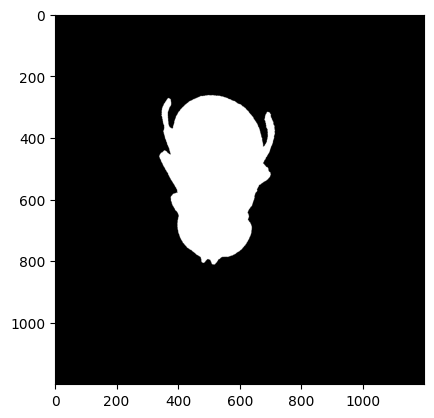

In [24]:
mask_fly = get_fill_flymask(fly_mask_adj,unrot_vec)
print(mask_fly.shape)
# img_fly = cv2.cvtColor(mask_fly, cv2.COLOR_BGR2GRAY)
# print(img_fly.shape)
plt.imshow(mask_fly, cmap ='gray')

height 1200
Angle: 71.65768391093329 71.6576839109333
Est Rotated Angle: -108.34231608906671 -1.89093013499064
mask radius 570
YO
<class 'numpy.ndarray'> (2, 3)
71.65768391093329 18.342316089066713 108.34231608906671
float64 int32
(1876, 2) (1876, 1)
(2, 3) (2, 2) (1876, 2)
Unrotated
[[-37.48203589 287.82824216]]

coords
(600.0, 519.2438720050503) (600.0, 516.8444216751003)

Applied
[[481 804]]
(675, 987) old body axis
(2, 2) (1, 2) [[156]
 [471]]
[[222]
 [118]] new body axis 0
(363, 46) old body axis 1
(2, 2) (1, 2) [[-156]
 [-470]]
[[814]
 [913]] new body axis 1
ANGLE: 1.250662518599153 71.65768391093329
Angle: 89.99979071884424 89.99979071884422
Est Rotated Angle: -90.00020928115578 -1.5707999794401273
(1200, 1200)


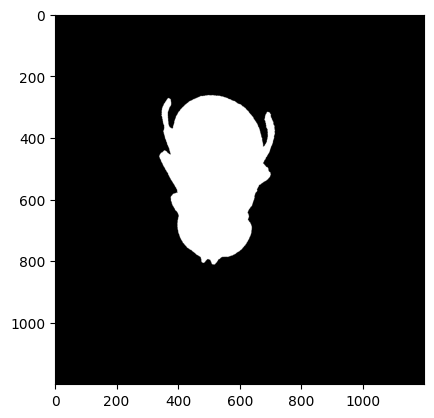

In [27]:
# file ="20240423102146_8500"
# file_name = "imgs/" + file +".png"
# fly_mask, max_contour,centroid, body_axis_pt_0,body_axis_pt_1 = get_contour_centroid(file_name)
fly_mask_adj, max_contour_adj,centroid_adj, body_axis_pt_0_adj,body_axis_pt_1_adj,unrot_vec  = contour_rot_matrix(file_name)
mask_fly = get_fill_flymask(fly_mask_adj,unrot_vec)
print(mask_fly.shape)
# img_fly = cv2.cvtColor(mask_fly, cv2.COLOR_BGR2GRAY)
# print(img_fly.shape)
plt.imshow(mask_fly, cmap ='gray')


## OLD METHODS : USE AS REFERENCE
These methods below used a non aligned contour..

In [30]:
# take the 30 contour points to the lefts and right of the two intersections and plot
adj_intersect = [(intersect[0][1]+50,intersect[0][1]-50),(intersect[1][1]+50,intersect[1][1]-50)]
print(adj_intersect)

[(1076, 976), (108, 8)]


In [31]:
np.array(body_axis_pt_0)

array([676, 988])

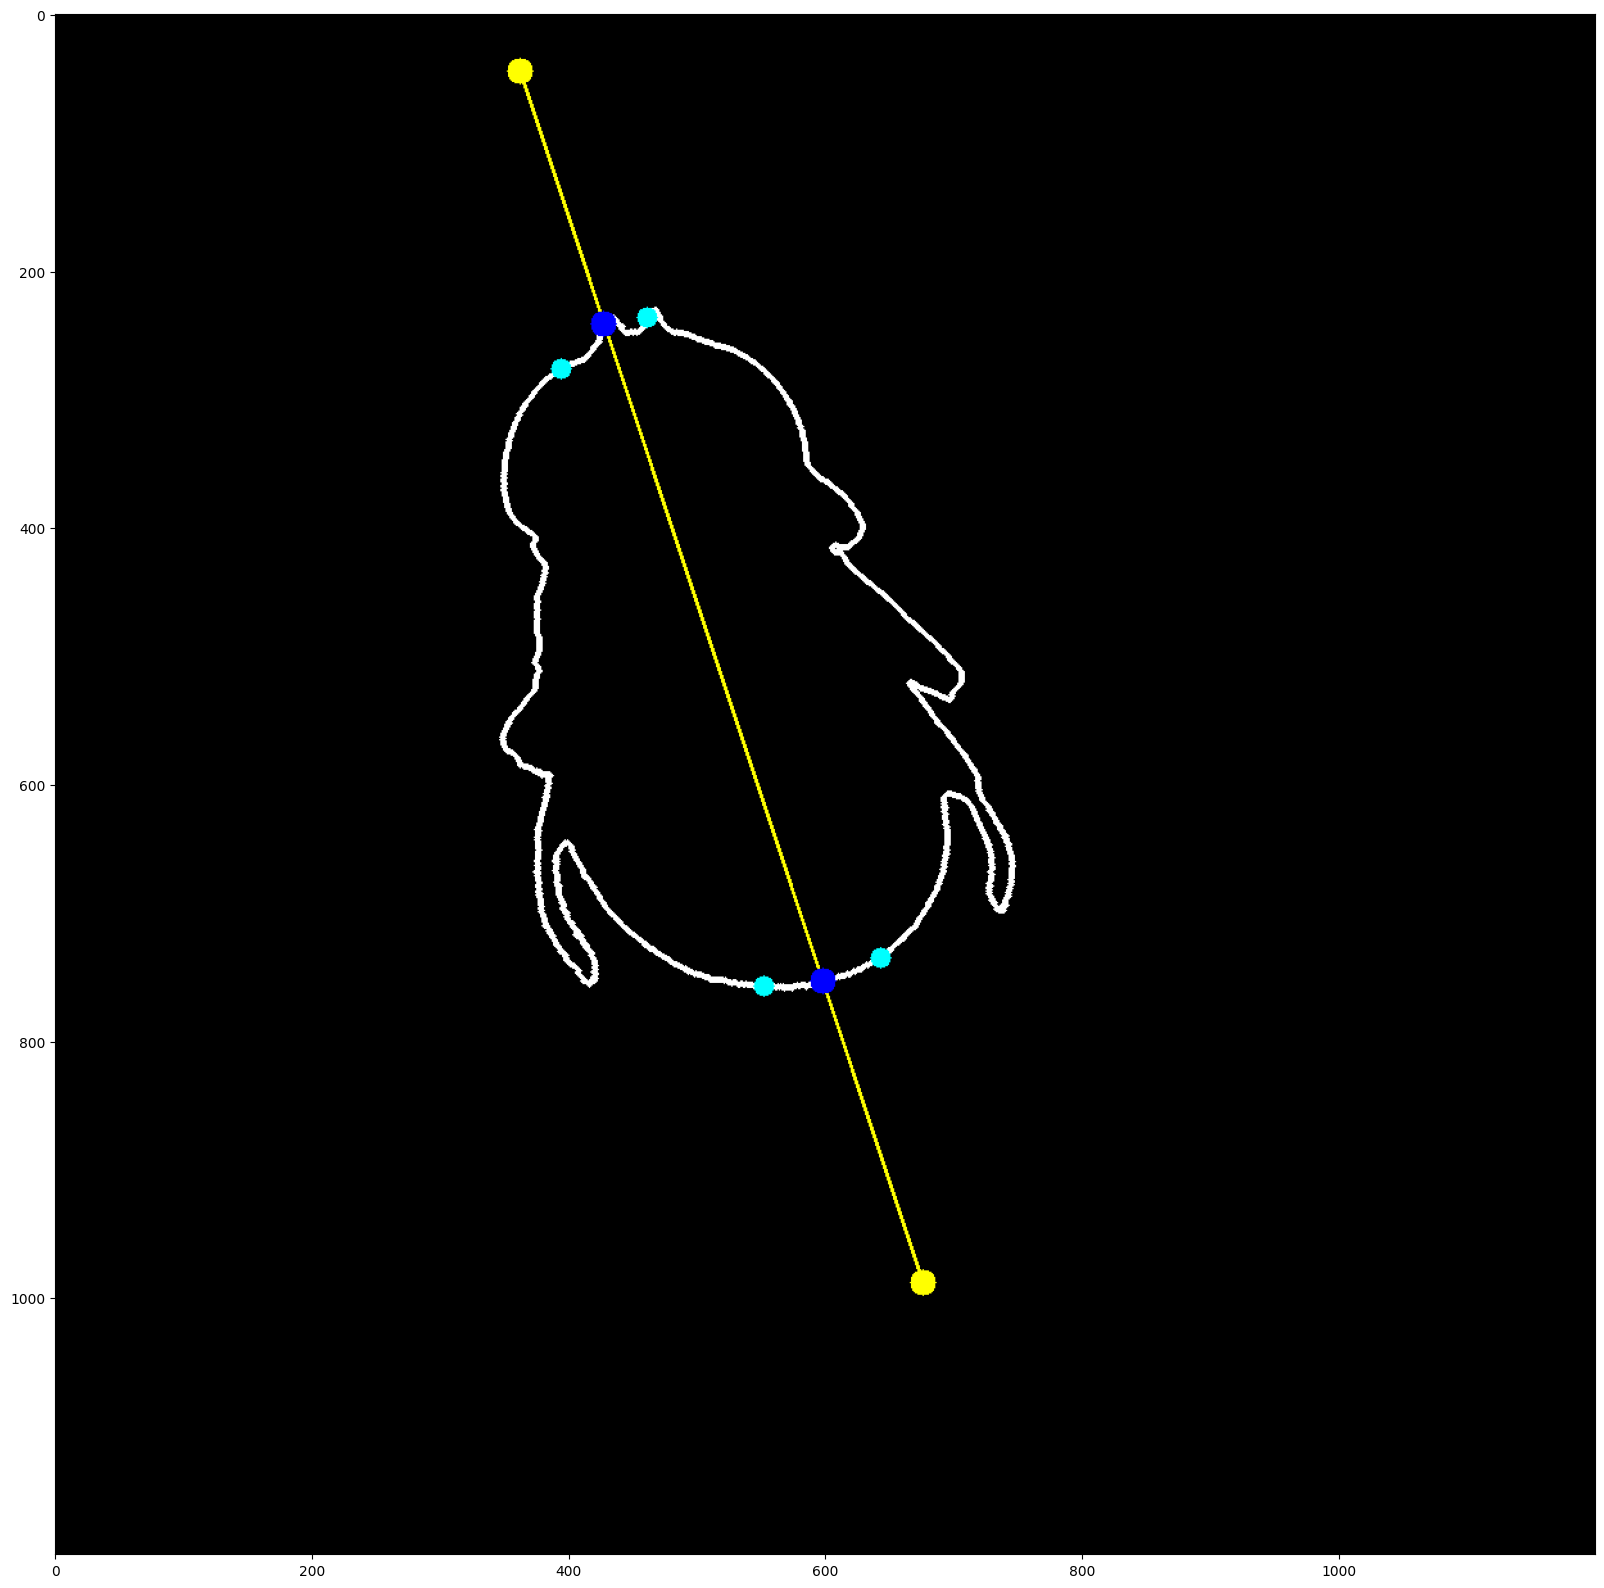

In [32]:
plt.figure(figsize=(20,20))
mask_fly = get_objectmask(fly_mask,max_contour)
cv2.circle(mask_fly,(body_axis_pt_0),10, color = (255,255,0),thickness =-3)
cv2.circle(mask_fly,(body_axis_pt_1),10, color = (255,255,0),thickness =-3)
cv2.line(mask_fly,body_axis_pt_0,body_axis_pt_1,color = (255,255,0), thickness = 2)
# for p in points:
#     cv2.circle(mask_fly,(p),10, color = (255,255,255),thickness =1)
# front 
cv2.circle(mask_fly,(max_contour[intersect[0][1]][0]),10, color = (0,0,255),thickness =-1 )
cv2.circle(mask_fly,(max_contour[adj_intersect[0][1]][0]),8, color = (0,255,255),thickness =-1 )
cv2.circle(mask_fly,(max_contour[adj_intersect[0][0]][0]),8, color = (0,255,255),thickness =-1 )


# cv2.circle(mask_fly,(max_contour[adj_intersect[0][0]+8][0]),10, color = (0,255,255),thickness =-1 )
# cv2.circle(mask_fly,(max_contour[adj_intersect[0][0]+16][0]),10, color = (0,255,255),thickness =-1 )
# cv2.circle(mask_fly,(max_contour[-1][0]),10, color = (0,0,255),thickness =-1 )

# back
cv2.circle(mask_fly,(max_contour[intersect[1][1]][0]),10, color = (0,0,255),thickness =-1 )
cv2.circle(mask_fly,(max_contour[adj_intersect[1][0]][0]),8, color = (0,255,255),thickness =-1 )
cv2.circle(mask_fly,(max_contour[adj_intersect[1][1]][0]),8, color = (0,255,255),thickness =-1 )
# cv2.circle(mask_fly, max_contour[2474][0] ,8,color = (0,255,255),thickness =4 )
plt.imshow(mask_fly)

In [33]:
# Here we get the range of contours for the two sides
# First check if value is negative.. if negative then add the length of the list
def isnegative(points):
    """checks if current value is negative and if so adds length of contour to it and returns new value"""
    for tple in range(len(points)):
        for val in range(len(points[tple])):
            points[tple]  = list(points[tple])
            if points[tple][val] < 0:
                # convert to mutable list
                points[tple][val] +=len(max_contour)
    return points

adj_intersect = isnegative(adj_intersect)

def get_contour_points():
    """
    Currently we are not getting the points in between...
    
    Will generate two contour lists that will contain the ranges of the back and front contours

    Ex: 
    82.... 1548 

    Contours Drawn Counter Clockwise...
    """
    ## test getting the ranges based on the adj_intersect
    contours_1 = max_contour[min(adj_intersect[0]):max(adj_intersect[0])+1]
    contours_2 = max_contour[min(adj_intersect[1]):max(adj_intersect[1])+1]

    ## check that the length of these are the same (at 101)
    if len(contours_1) == len(contours_2) and len(contours_2) == 101:
        print("True")
    
    ## if this is not the case then need to determine which case is not 101
    else:
        print(len(contours_1),len(contours_2))
        if len(contours_1) != 101:
            ## issue is that there is a case where we are going over the endpoint
            ## solution: create to lists... 
            # List 1: 0 to min idx value +1
            # List 2: max idx value to the len of list -1
            list1 = max_contour[:min(adj_intersect[0])+1]

            list2 = max_contour[max(adj_intersect[0]):len(max_contour)]
  
            contours_1 = np.concatenate((list2,list1),axis =0)
        elif len(contours_2) != 101:
            list1 = max_contour[:min(adj_intersect[1])+1]
            list2 = max_contour[max(adj_intersect[1]):len(max_contour)]
            contours_2 = np.concatenate((list2,list1),axis =0)
    
        ## check that the length of these are the same (at 101)
    if len(contours_1) == len(contours_2) and len(contours_2) == 101:
        print("Adjusted True")
        print(len(contours_1),len(contours_2))
    

    return contours_1, contours_2

contours_1, contours_2 = get_contour_points()
print(contours_1)



True
Adjusted True
101 101
[[[552 757]]

 [[553 757]]

 [[554 757]]

 [[555 757]]

 [[556 758]]

 [[556 757]]

 [[557 756]]

 [[558 757]]

 [[559 757]]

 [[560 757]]

 [[561 758]]

 [[562 758]]

 [[563 757]]

 [[564 758]]

 [[565 757]]

 [[566 758]]

 [[567 757]]

 [[568 758]]

 [[568 759]]

 [[569 758]]

 [[570 758]]

 [[571 758]]

 [[572 758]]

 [[573 758]]

 [[574 759]]

 [[574 758]]

 [[575 757]]

 [[576 757]]

 [[577 757]]

 [[578 756]]

 [[579 757]]

 [[580 757]]

 [[581 756]]

 [[582 756]]

 [[583 756]]

 [[584 756]]

 [[585 757]]

 [[585 758]]

 [[586 757]]

 [[587 756]]

 [[588 756]]

 [[589 756]]

 [[590 756]]

 [[591 755]]

 [[592 755]]

 [[593 754]]

 [[594 754]]

 [[595 753]]

 [[596 754]]

 [[597 754]]

 [[598 753]]

 [[599 753]]

 [[600 753]]

 [[601 753]]

 [[602 753]]

 [[603 752]]

 [[604 752]]

 [[605 752]]

 [[606 752]]

 [[607 752]]

 [[608 751]]

 [[609 750]]

 [[610 749]]

 [[611 750]]

 [[612 749]]

 [[613 749]]

 [[614 749]]

 [[615 749]]

 [[616 748]]

 [[617 

In [34]:
# With the ranges of contours we can now start to analyze the shapes of the contours
def extract_contour_dat(cont_dat):
    """Extract the contour data into useable x y format"""
    x = []
    y = []
    for cont in cont_dat:
        x.append(cont[0][0])
        y.append(cont[0][1])
    return x,y

cont_1_x, cont_1_y = extract_contour_dat(contours_1)
cont_2_x, cont_2_y = extract_contour_dat(contours_2)

In [36]:
np.array(cont_1_y)

array([757, 757, 757, 757, 758, 757, 756, 757, 757, 757, 758, 758, 757,
       758, 757, 758, 757, 758, 759, 758, 758, 758, 758, 758, 759, 758,
       757, 757, 757, 756, 757, 757, 756, 756, 756, 756, 757, 758, 757,
       756, 756, 756, 756, 755, 755, 754, 754, 753, 754, 754, 753, 753,
       753, 753, 753, 752, 752, 752, 752, 752, 751, 750, 749, 750, 749,
       749, 749, 749, 748, 747, 748, 748, 747, 746, 745, 746, 745, 744,
       744, 744, 744, 743, 742, 742, 741, 740, 741, 740, 739, 739, 738,
       737, 738, 737, 736, 736, 737, 738, 737, 736, 735], dtype=int32)

### 007

In [37]:
import diptest
###

# only the dip statistic
dip = diptest.dipstat(np.array(cont_1_y))
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_1_y))
print(dip,pval)

# only the dip statistic
dip = diptest.dipstat(np.array(cont_2_y))
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_2_y))
print(dip,pval)

0.06435643564356436 0.0029106121155506592
0.047854785478547844 0.0882859043708919


In [39]:
# only the dip statistic
dip = diptest.dipstat(np.array(cont_1_y)*-1)
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_1_y)*-1)
print(dip,pval)

# only the dip statistic
dip = diptest.dipstat(np.array(cont_2_y)*-1)
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_2_y)*-1)
print(dip,pval)

0.06435643564356436 0.0029106121155506592
0.04785478547854785 0.08828590437089179


#### 6762

In [40]:
import diptest
# only the dip statistic
dip = diptest.dipstat(np.array(cont_1_y))
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_1_y))
print(dip,pval)

# only the dip statistic
dip = diptest.dipstat(np.array(cont_2_y))
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_2_y))
print(dip,pval)

0.06435643564356436 0.0029106121155506592
0.047854785478547844 0.0882859043708919


In [41]:
# only the dip statistic
dip = diptest.dipstat(np.array(cont_1_y)*-1)
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_1_y)*-1)
print(dip,pval)

# only the dip statistic
dip = diptest.dipstat(np.array(cont_2_y)*-1)
    
# both the dip statistic and p-value
dip, pval = diptest.diptest(np.array(cont_2_y)*-1)
print(dip,pval)

0.06435643564356436 0.0029106121155506592
0.04785478547854785 0.08828590437089179


c:\Users\lkrow\anaconda3\envs\flydev\lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\lkrow\anaconda3\envs\flydev\lib\site-packages\numpy\lib\function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\lkrow\anaconda3\envs\flydev\lib\site-packages\numpy\lib\function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\lkrow\anaconda3\envs\flydev\lib\site-packages\numpy\lib\function_base.py:1250: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
c:\Users\lkrow\anaconda3\envs\flydev\lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\lkrow\anaconda3\envs\flydev\lib\site-packages\numpy\lib\function_base.p

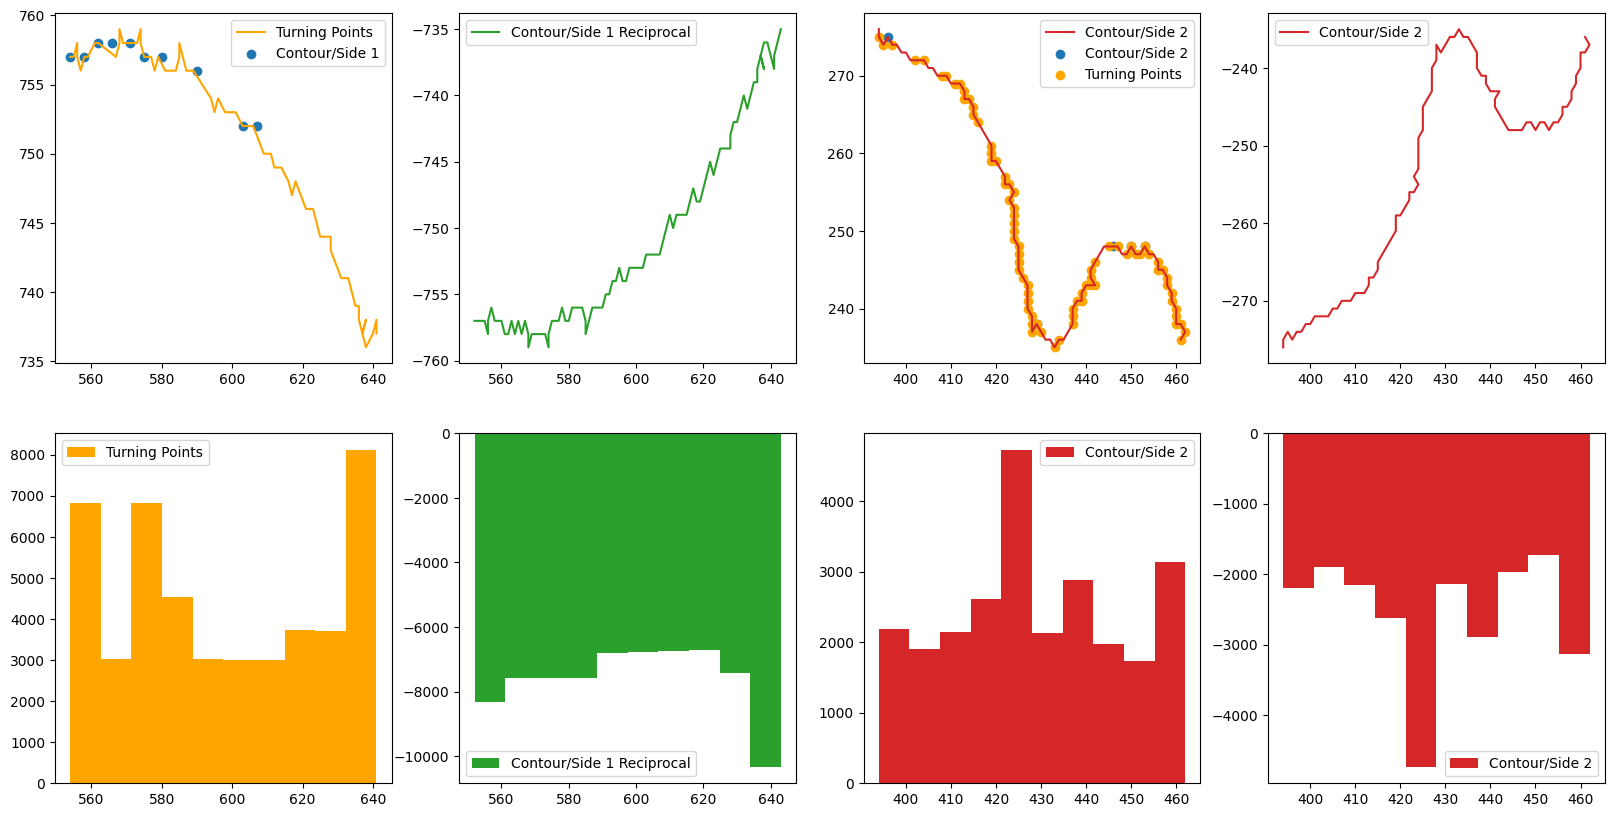

In [42]:
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
peaks_cont_1y, _ = find_peaks(np.array(cont_1_y))
dy = np.gradient(np.array(cont_1_y),np.array(cont_1_x))
zero_crossings = np.where(np.diff(np.sign(dy)))[0]
peaks_cont_2y, _ = find_peaks(np.array(cont_2_y))
dy2 = np.gradient(np.array(cont_2_y),np.array(cont_2_x))
zero_crossings2 = np.where(np.diff(np.sign(dy2)))[0]
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
# plt.plot(np.array(cont_1_x),np.array(cont_1_y), color = 'tab:green', label = "Contour/Side 1")
# plt.scatter(np.array(cont_1_x)[peaks_cont_1y],np.array(cont_1_y)[peaks_cont_1y], color = 'tab:blue', label = "Contour/Side 1")
plt.plot(np.array(cont_1_x)[zero_crossings], np.array(cont_1_y)[zero_crossings],label="Turning Points", color="orange")
peaks_cont_1y, _ = find_peaks(np.array(cont_1_y)[zero_crossings])
plt.scatter(np.array(cont_1_x)[peaks_cont_1y],np.array(cont_1_y)[peaks_cont_1y], color = 'tab:blue', label = "Contour/Side 1")
plt.legend()
plt.subplot(2,4,2)
plt.plot(np.array(cont_1_x),np.array(cont_1_y)*-1, color = 'tab:green', label = "Contour/Side 1 Reciprocal")
plt.legend()
plt.subplot(2,4,3)
plt.plot(cont_2_x,cont_2_y, color = 'tab:red',label = "Contour/Side 2")
plt.scatter(np.array(cont_2_x)[peaks_cont_2y],np.array(cont_2_y)[peaks_cont_2y], color = 'tab:blue', label = "Contour/Side 2")
plt.scatter(np.array(cont_2_x)[zero_crossings2], np.array(cont_2_y)[zero_crossings2],label="Turning Points", color="orange")
plt.legend()
plt.subplot(2,4,4)
plt.plot(np.array(cont_2_x),np.array(cont_2_y)*-1, color = 'tab:red',label = "Contour/Side 2")
plt.legend()

# HISTOGRAMS
plt.subplot(2,4,5)
plt.hist(x = np.array(cont_1_x)[zero_crossings], weights = np.array(cont_1_y)[zero_crossings], label="Turning Points", color="orange")
peaks_cont_1y, _ = find_peaks(np.array(cont_1_y)[zero_crossings])
# plt.scatter(np.array(cont_1_x)[peaks_cont_1y],np.array(cont_1_y)[peaks_cont_1y], color = 'tab:blue', label = "Contour/Side 1")
plt.legend()
plt.subplot(2,4,6)
plt.hist(x = np.array(cont_1_x),weights = np.array(cont_1_y)*-1, color = 'tab:green', label = "Contour/Side 1 Reciprocal")
plt.legend()
plt.subplot(2,4,7)
plt.hist(x = cont_2_x,weights = cont_2_y, color = 'tab:red',label = "Contour/Side 2")
# plt.scatter(np.array(cont_2_x)[peaks_cont_2y],np.array(cont_2_y)[peaks_cont_2y], color = 'tab:blue', label = "Contour/Side 2")
# plt.scatter(np.array(cont_2_x)[zero_crossings2], np.array(cont_2_y)[zero_crossings2],label="Turning Points", color="orange")
plt.legend()
plt.subplot(2,4,8)
plt.hist(x = np.array(cont_2_x),weights = np.array(cont_2_y)*-1, color = 'tab:red',label = "Contour/Side 2")
plt.legend()

plt.show()

c:\Users\lkrow\anaconda3\envs\flydev\lib\site-packages\seaborn\distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)
c:\Users\lkrow\anaconda3\envs\flydev\lib\site-packages\seaborn\distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


<Axes: ylabel='Count'>

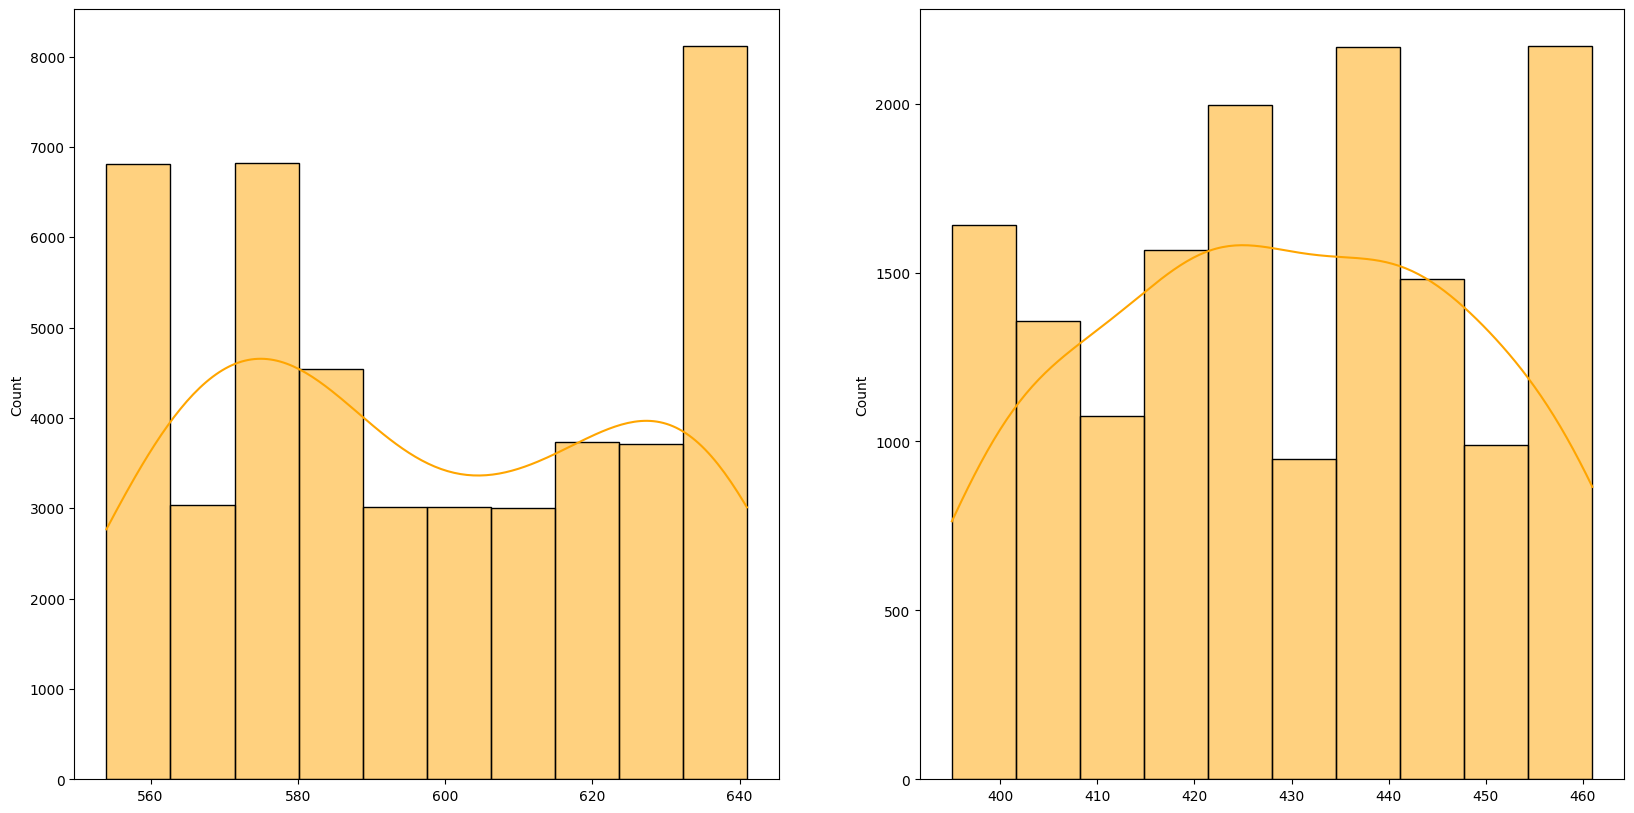

In [43]:
import seaborn as sns
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.histplot(x = np.array(cont_1_x)[zero_crossings], weights = np.array(cont_1_y)[zero_crossings], label="Turning Points", color="orange",kde = True)
plt.subplot(1,2,2)
sns.histplot(x = np.array(cont_2_x)[zero_crossings], weights = np.array(cont_2_y)[zero_crossings],label="Turning Points", color="orange", kde = True )

## Attempt Gaussian Mixture Modelling

In [46]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Example data
data = np.concatenate([np.array(cont_2_x)[zero_crossings], np.array(cont_2_y)[zero_crossings]])

# Fit a Gaussian Mixture Model with two components
gmm = GaussianMixture(n_components=2).fit(data.reshape(-1, 1))

# Predict component membership for each data point
labels = gmm.predict(data.reshape(-1, 1))

# Check how many unique components there are
num_components = len(np.unique(labels))
print("Number of components:", num_components)

Number of components: 2
